In [1]:
import os
os.environ['IF_CPP_MIN_LOG_LEVEL']='3'
from tensorflow import keras
from matplotlib import pyplot as plt



Data Read Done!
Training X Size: (50000, 32, 32)
Training Y Size: (50000, 1)
Test X Size: (10000, 32, 32)
Test Y Size: (10000, 1)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2148 - loss: 2.1441 - val_accuracy: 0.2922 - val_loss: 1.9812
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2985 - loss: 1.9564 - val_accuracy: 0.3152 - val_loss: 1.9181
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3297 - loss: 1.8864 - val_accuracy: 0.3380 - val_loss: 1.8647
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3469 - loss: 1.8401 - val_accuracy: 0.3486 - val_loss: 1.8316
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3588 - loss: 1.8116 - val_accuracy: 0.3550 - val_loss: 1.8106
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3665 - loss: 1.7950 - val_accuracy: 0.3391 - val_loss: 1.8528
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3721 - loss: 1.7715 - val_accuracy: 0.3627 - val_loss: 1.7938
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3802 - loss: 1

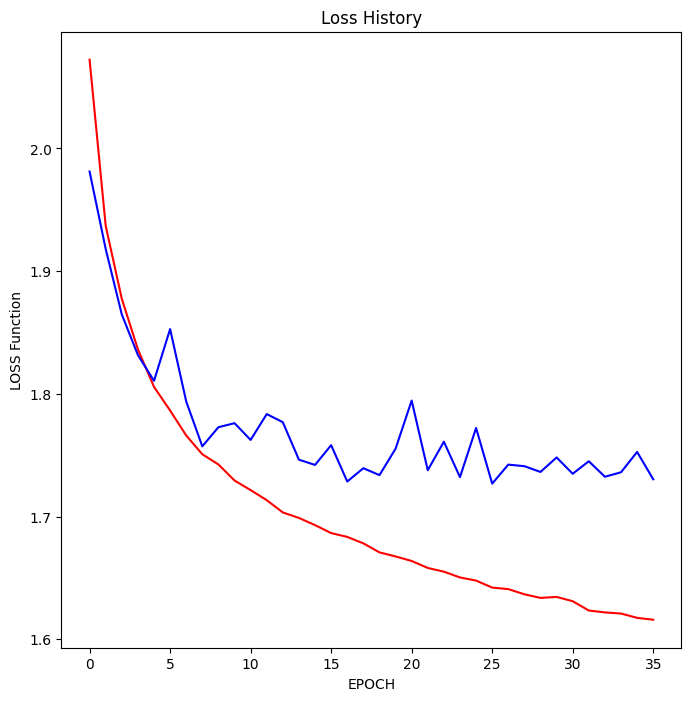

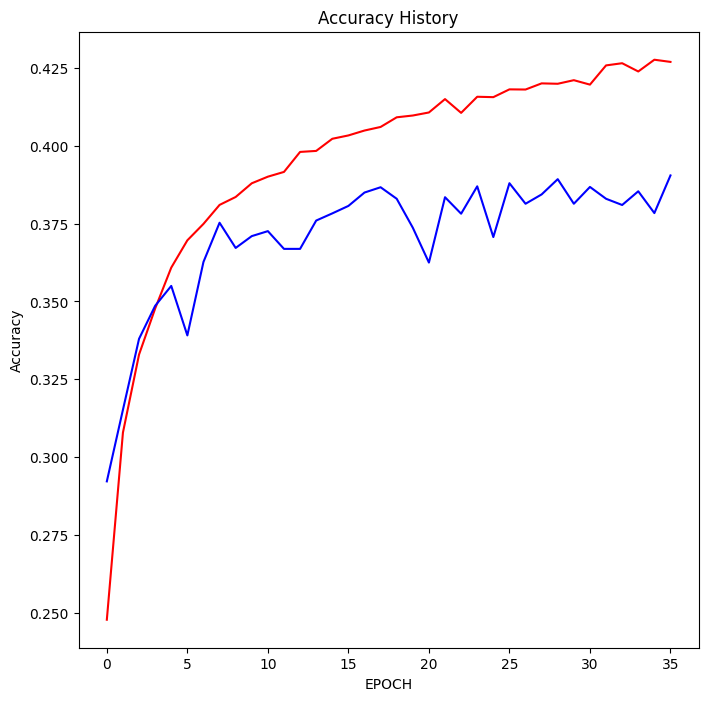

In [10]:
#이미지를 입력하면 그 이미지가 비행기(airplane), 자동차(automobile), 개(dog) 같은 10개의 클래스 중 어떤 것인지 분류
#MLP(다층 퍼셉트론)방식
class DataReader:
  def __init__(self):
    self.label_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    self.cifar=keras.datasets.cifar10
    (self.origin_train_X,self.train_Y),(self.origin_test_X,self.test_Y)=self.cifar.load_data()
    self.train_X=self.preprocess(self.origin_train_X)
    self.test_X=self.preprocess(self.origin_test_X)

    print("\n\nData Read Done!")
    print('Training X Size: '+ str(self.train_X.shape))
    print('Training Y Size: '+ str(self.train_Y.shape))
    print('Test X Size: '+ str(self.test_X.shape))
    print('Test Y Size: '+str(self.test_Y.shape) +'\n\n')

  def preprocess(self,images):
    images=images/255.0   # 픽셀 값을 0~1로 정규화
    r=images[:,:,:,0]
    g=images[:,:,:,1]
    b=images[:,:,:,2]
    return (r+g+b) /3.0

dr=DataReader()

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32)),   #CNN의 출력을 1D 벡터로 변환
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')  #10개의 클래스가 있으므로, 뉴런 10개
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history=model.fit(dr.train_X, dr.train_Y, epochs=100,validation_split=0.2,callbacks=[early_stop])

train_history =history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")



Data Read Done!
Training X Size : (50000, 32, 32, 3)
Training Y Size : (50000, 1)
Test X Size : (10000, 32, 32, 3)
Test Y Size : (10000, 1)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 70ms/step - accuracy: 0.3759 - loss: 1.7364 - val_accuracy: 0.4617 - val_loss: 1.5733
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 68ms/step - accuracy: 0.5800 - loss: 1.1925 - val_accuracy: 0.6116 - val_loss: 1.0905
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 65ms/step - accuracy: 0.6398 - loss: 1.0310 - val_accuracy: 0.4551 - val_loss: 1.8443
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 68ms/step - accuracy: 0.6770 - loss: 0.9263 - val_accuracy: 0.6838 - val_loss: 0.9360
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 67ms/step - accuracy: 0.7099 - loss: 0.8437 - val_accuracy: 0.6930 - val_loss: 0.9054
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 66ms/step - accuracy: 0.7335 - loss: 0.7763 - val_accuracy: 0.6930 - val_loss: 0.8841
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms

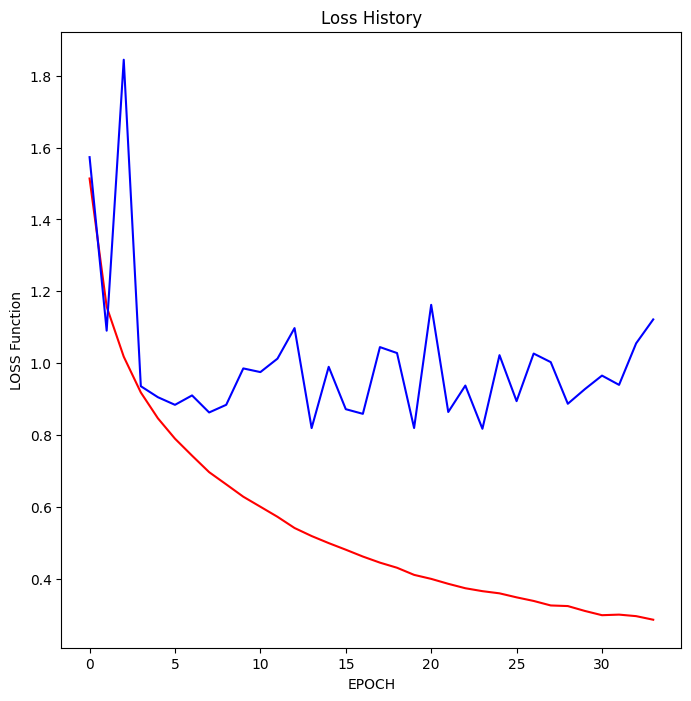

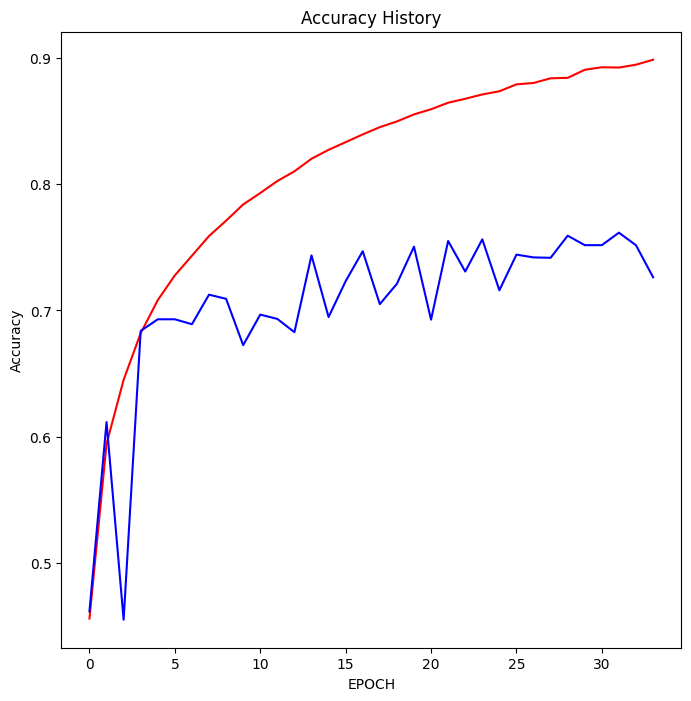

In [15]:
#CNN기법(방법2)
#MLP: Flatten() 후 모든 픽셀을 연결 → 공간 정보 손실
#CNN: Conv2D와 MaxPooling2D를 사용하여 이미지의 패턴을 학습 → 성능 향상
class DataReader:
    def __init__(self):
        self.label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
        self.cifar = keras.datasets.cifar10
        (self.train_X, self.train_Y), (self.test_X, self.test_Y) = self.cifar.load_data()

        self.train_X = self.preprocess(self.train_X)
        self.test_X = self.preprocess(self.test_X)

        print("\n\nData Read Done!")
        print("Training X Size : " + str(self.train_X.shape))
        print("Training Y Size : " + str(self.train_Y.shape))
        print("Test X Size : " + str(self.test_X.shape))
        print("Test Y Size : " + str(self.test_Y.shape) + '\n\n')

    def preprocess(self, images):
        return images / 255.0

dr = DataReader()

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3)),  #3x3 필터를 적용하여 이미지 특징 추출 (32개의 필터)
    keras.layers.BatchNormalization(),  #	데이터 정규화 → 학습 안정화
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D((2, 2)),  #	2x2 크기로 풀링 → 특징 압축

    keras.layers.Conv2D(64, (3, 3)),  #더 깊은 특징을 추출하는 합성곱 (64개의 필터)
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),  #완전 연결층 (128개의 뉴런)
    keras.layers.Dropout(rate=0.5),  #Dropout을 작게 설정하면 학습 데이터에 대해 정확도가 높을 가능성이 큼
                                    #검증 데이터에서는 과적합이 발생할 수도, 일반적으론 0.5사용
    keras.layers.Dense(10, activation='softmax')  #10개의 클래스로 분류하는 출력층
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=100,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")